In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

%matplotlib inline

#### Data Gathering

In [4]:
#Reading the data
calendar = pd.read_csv("./calendar.csv")
listings = pd.read_csv("./listings.csv")
reviews = pd.read_csv("./reviews.csv")

In [5]:
#### Data Assessment

In [6]:
#know the Dimensions of the Datasets
print("calendar : ", calendar.shape)
print("listings : ", listings.shape)
print("reviews : ", reviews.shape)

calendar :  (4807780, 7)
listings :  (13172, 16)
reviews :  (581668, 6)


In [7]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,15420,2020-03-21,f,$65.00,$65.00,3,30
1,15420,2020-03-22,t,$65.00,$65.00,3,30
2,15420,2020-03-23,t,$65.00,$65.00,3,30
3,15420,2020-03-24,t,$65.00,$65.00,3,30
4,15420,2020-03-25,t,$65.00,$65.00,3,30


In [8]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4807780 entries, 0 to 4807779
Data columns (total 7 columns):
listing_id        int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights    int64
maximum_nights    int64
dtypes: int64(3), object(4)
memory usage: 256.8+ MB


In [9]:
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,15420,Georgian Boutique Apt City Centre,60423,Charlotte,NaN,"Old Town, Princes Street and Leith Street",55.95689,-3.18768,Entire home/apt,80,3,328,2020-03-17,2.94,1,265
1,24288,"Cool central Loft, sleeps 4, 2 double bed+en-s...",46498,Gordon,NaN,"Canongate, Southside and Dumbiedykes",55.94383,-3.18445,Entire home/apt,95,2,217,2020-02-22,1.88,1,0
2,38628,Edinburgh Holiday Let,165635,Trish,NaN,Joppa,55.94215,-3.09640,Entire home/apt,46,4,55,2019-10-09,0.78,2,232
3,47616,"City flat, close to nature and the Fringe",216203,Ben,NaN,"Canongate, Southside and Dumbiedykes",55.94732,-3.17851,Private room,100,2,35,2019-10-13,0.74,1,0
4,48645,Large Sunny Room on Royal Mile,221474,Mark,NaN,"Canongate, Southside and Dumbiedykes",55.95072,-3.18305,Private room,60,1,874,2020-03-17,7.85,2,118


In [10]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13172 entries, 0 to 13171
Data columns (total 16 columns):
id                                13172 non-null int64
name                              13172 non-null object
host_id                           13172 non-null int64
host_name                         13170 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     13172 non-null object
latitude                          13172 non-null float64
longitude                         13172 non-null float64
room_type                         13172 non-null object
price                             13172 non-null int64
minimum_nights                    13172 non-null int64
number_of_reviews                 13172 non-null int64
last_review                       11615 non-null object
reviews_per_month                 11611 non-null float64
calculated_host_listings_count    13172 non-null int64
availability_365                  13172 non-null int64
dt

In [11]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,15420,171793,2011-01-18,186358,Nels,My wife and I stayed at this beautiful apartme...
1,15420,176350,2011-01-31,95218,Gareth,Charlotte couldn't have been a more thoughtful...
2,15420,232149,2011-04-19,429751,Guido,I went to Edinburgh for the second time on Apr...
3,15420,236073,2011-04-23,420830,Mariah,This flat was incredible. As other guests have...
4,15420,263713,2011-05-15,203827,Linda,Fantastic host and the apartment was perfect. ...


In [12]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581668 entries, 0 to 581667
Data columns (total 6 columns):
listing_id       581668 non-null int64
id               581668 non-null int64
date             581668 non-null object
reviewer_id      581668 non-null int64
reviewer_name    581668 non-null object
comments         581513 non-null object
dtypes: int64(3), object(3)
memory usage: 26.6+ MB


In [13]:
# Verify the same number of listing ids
calendar.shape[0]/365

13172.0

In [14]:
### 3) Prepare Data
#Wrangle, clean, EDA and preprocess the data.

#### Data Wrangling

In [15]:
####Checking for null values

In [16]:
listings.isnull().mean()

id                                0.000000
name                              0.000000
host_id                           0.000000
host_name                         0.000152
neighbourhood_group               1.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.118205
reviews_per_month                 0.118509
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [17]:
# removing unwanted column "neighbourhood_group"
listings.drop('neighbourhood_group', axis=1, inplace=True)

In [18]:
# 'price' column in 'calendar' dataset is Object/string, converting it to same as in 'listings' int64
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,15420,2020-03-21,f,$65.00,$65.00,3,30
1,15420,2020-03-22,t,$65.00,$65.00,3,30
2,15420,2020-03-23,t,$65.00,$65.00,3,30
3,15420,2020-03-24,t,$65.00,$65.00,3,30
4,15420,2020-03-25,t,$65.00,$65.00,3,30


In [19]:
calendar['price'] = calendar['price'].str.replace(',', '')
calendar['price'] = calendar['price'].str.replace('$', '')
calendar['adjusted_price'] = calendar['adjusted_price'].str.replace(',', '')
calendar['adjusted_price'] = calendar['adjusted_price'].str.replace('$', '')
calendar['price'] = calendar['price'].astype(float)
calendar['adjusted_price'] = calendar['adjusted_price'].astype(float)

In [20]:
# 'available' column in 'calendar' dataset is Object/string, converting it to boolean
calendar['available'] = calendar['available'] == 't'

In [21]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,15420,2020-03-21,False,65.0,65.0,3,30
1,15420,2020-03-22,True,65.0,65.0,3,30
2,15420,2020-03-23,True,65.0,65.0,3,30
3,15420,2020-03-24,True,65.0,65.0,3,30
4,15420,2020-03-25,True,65.0,65.0,3,30


In [22]:
#sort by date
calendar['date'].sort_values(ascending=True);

In [23]:
calendar.head(1),calendar.tail(1)

(   listing_id        date  available  price  adjusted_price  minimum_nights  \
 0       15420  2020-03-21      False   65.0            65.0               3   
 
    maximum_nights  
 0              30  ,
          listing_id        date  available  price  adjusted_price  \
 4807779    42922096  2021-03-20      False   56.0            56.0   
 
          minimum_nights  maximum_nights  
 4807779               1            1125  )

In [24]:
# converting date column from object/string to actual date type
calendar['date'] = pd.to_datetime(calendar['date'])


In [25]:
calendar.dtypes

listing_id                 int64
date              datetime64[ns]
available                   bool
price                    float64
adjusted_price           float64
minimum_nights             int64
maximum_nights             int64
dtype: object

Exploratory Data Analysis¶

In [26]:
df = calendar.groupby('listing_id')

In [27]:
# Total revenue generated for all rooms for the year
calendar['price'].sum()

606112325.0

In [28]:
# Total occupancy/availability ratio/percentage of all the properties for the whole year
calendar['available'].mean()*100

28.724151271480807

In [29]:
# Average price of each night for each listing for all the properties
df['price'].mean().mean()

126.06906410027086

In [30]:
# get number of listings. As we have seen that calendar dataset holds all the listing for the whole year, we are diving it by 365
calendar.shape[0]/365
# see this number is matching with listing's Rows....that means we have right samples

13172.0

In [31]:
# average revenue per listing for the whole year
avg_revenue_annual = calendar['price'].sum()/(calendar.shape[0]/365)
avg_revenue_annual

46015.20839659885

Now we need to merge the dataset's somehow

In [32]:
listings.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,15420,Georgian Boutique Apt City Centre,60423,Charlotte,"Old Town, Princes Street and Leith Street",55.95689,-3.18768,Entire home/apt,80,3,328,2020-03-17,2.94,1,265
1,24288,"Cool central Loft, sleeps 4, 2 double bed+en-s...",46498,Gordon,"Canongate, Southside and Dumbiedykes",55.94383,-3.18445,Entire home/apt,95,2,217,2020-02-22,1.88,1,0
2,38628,Edinburgh Holiday Let,165635,Trish,Joppa,55.94215,-3.09640,Entire home/apt,46,4,55,2019-10-09,0.78,2,232
3,47616,"City flat, close to nature and the Fringe",216203,Ben,"Canongate, Southside and Dumbiedykes",55.94732,-3.17851,Private room,100,2,35,2019-10-13,0.74,1,0
4,48645,Large Sunny Room on Royal Mile,221474,Mark,"Canongate, Southside and Dumbiedykes",55.95072,-3.18305,Private room,60,1,874,2020-03-17,7.85,2,118


In [33]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,15420,2020-03-21,False,65.0,65.0,3,30
1,15420,2020-03-22,True,65.0,65.0,3,30
2,15420,2020-03-23,True,65.0,65.0,3,30
3,15420,2020-03-24,True,65.0,65.0,3,30
4,15420,2020-03-25,True,65.0,65.0,3,30


In [34]:
# if we observe above data, we can see that we can join both datasets if we rename the id column in listings to listing_id
listings['neighbourhood'].value_counts()

Old Town, Princes Street and Leith Street    1084
Deans Village                                 613
Tollcross                                     598
Meadows and Southside                         497
Hillside and Calton Hill                      483
                                             ... 
Clovenstone and Wester Hailes                  16
Fairmilehead                                   16
Corstorphine North                             14
Moredun and Craigour                           13
Queensferry West                               10
Name: neighbourhood, Length: 111, dtype: int64

In [35]:
# we are interested only in neighbour hood, so we will take out neighbourhood based upon listing_id from the listings dataset
listings_nh = listings[['id','neighbourhood']]

In [36]:
listings_nh.head()

,id,neighbourhood
0,15420,"Old Town, Princes Street and Leith Street"
1,24288,"Canongate, Southside and Dumbiedykes"
2,38628,Joppa
3,47616,"Canongate, Southside and Dumbiedykes"
4,48645,"Canongate, Southside and Dumbiedykes"


In [37]:
# renaming the id column to listing_id
listings_nh = listings_nh.rename(columns={"id": "listing_id"}) 

In [38]:
listings_nh.head()

,listing_id,neighbourhood
0,15420,"Old Town, Princes Street and Leith Street"
1,24288,"Canongate, Southside and Dumbiedykes"
2,38628,Joppa
3,47616,"Canongate, Southside and Dumbiedykes"
4,48645,"Canongate, Southside and Dumbiedykes"


In [39]:
# now merging the datasets calendar and new dataset listings_nh by using primary key/listing_id
listings_calendar = pd.merge(calendar, listings_nh, on=['listing_id','listing_id'])

In [40]:
listings_calendar.dtypes

listing_id                 int64
date              datetime64[ns]
available                   bool
price                    float64
adjusted_price           float64
minimum_nights             int64
maximum_nights             int64
neighbourhood             object
dtype: object

In [41]:
listings_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,neighbourhood
0,15420,2020-03-21,False,65.0,65.0,3,30,"Old Town, Princes Street and Leith Street"
1,15420,2020-03-22,True,65.0,65.0,3,30,"Old Town, Princes Street and Leith Street"
2,15420,2020-03-23,True,65.0,65.0,3,30,"Old Town, Princes Street and Leith Street"
3,15420,2020-03-24,True,65.0,65.0,3,30,"Old Town, Princes Street and Leith Street"
4,15420,2020-03-25,True,65.0,65.0,3,30,"Old Town, Princes Street and Leith Street"


In [42]:
listings_calendar.dtypes

listing_id                 int64
date              datetime64[ns]
available                   bool
price                    float64
adjusted_price           float64
minimum_nights             int64
maximum_nights             int64
neighbourhood             object
dtype: object

In [43]:
#converting neighbourhood variable to categorical variable
listings_calendar['neighbourhood'] = listings_calendar['neighbourhood'].astype('category')


In [44]:
listings_calendar.dtypes

listing_id                 int64
date              datetime64[ns]
available                   bool
price                    float64
adjusted_price           float64
minimum_nights             int64
maximum_nights             int64
neighbourhood           category
dtype: object

In [45]:
listings_calendar.neighbourhood.unique().tolist()

['Old Town, Princes Street and Leith Street',
 'The Shore and Constitution Street',
 'New Town East and Gayfield',
 'Hillside and Calton Hill',
 'Canongate, Southside and Dumbiedykes',
 'Broughton North and Powderhall',
 'Deans Village',
 'Joppa',
 'Bonnington',
 'Broughton South',
 'Meadowbank and Abbeyhill North',
 'Bruntsfield',
 'Pilrig',
 'Merchiston and Greenhill',
 'Comiston and Swanston',
 'Western Harbour and Leith Docks',
 'Marchmont West',
 'Willowbrae and Duddingston Village',
 'New Town West',
 'Great Junction Street',
 'Meadows and Southside',
 'Shandon',
 'Dalry and Fountainbridge',
 'Corstorphine',
 'Morningside',
 'Tollcross',
 'Abbeyhill',
 'Easter Road and Hawkhill Avenue',
 'Prestonfield',
 'Barnton, Cammo and Cramond South',
 'North Leith and Newhaven',
 'Leith (Albert Street)',
 'Stockbridge',
 'Granton West and Salvesen',
 "Siverknowes and Davidson's Mains",
 'Boswall and Pilton',
 'Gorgie East',
 'South Leith',
 'Blackford, West Mains and Mayfield Road',
 'The G

In [46]:
# so, all the names in neighbourhood are proper and no need to make any changes

In [47]:
# List of months and days of weeks for visualizations
month_list=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
week_list=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

Question 1 # Price changes over months / ideal month to travel to get cheap holiday accomadation by neighbourhood

In [48]:
avg_price_per_night_by_month = listings_calendar.groupby(listings_calendar['date'].dt.strftime('%m'))['price'].mean()
avg_price_per_night_by_month = pd.DataFrame(avg_price_per_night_by_month).reset_index()

In [49]:
avg_price_per_night_by_month['date'] = avg_price_per_night_by_month.replace(['01','02','03','04','05','06','07','08','09','10','11','12'], month_list)
avg_price_per_night_by_month

,date,price
0,Jan,129.807443
1,Feb,133.266358
2,Mar,125.392183
3,Apr,108.690923
4,May,114.993909
5,Jun,114.397553
6,Jul,119.231177
7,Aug,161.888473
8,Sep,125.115128
9,Oct,124.019614


In [50]:
# From the above data, we can see that months Apr,May,June,July are the cheapest months to visit

In [52]:
#Let's dig deep and see which weekday/s are cheapest

avg_price_per_night_by_weekday = listings_calendar.groupby(listings_calendar['date'].dt.strftime('%w'))['price'].mean()
avg_price_per_night_by_weekday = pd.DataFrame(avg_price_per_night_by_weekday).reset_index()

In [53]:
avg_price_per_night_by_weekday['date'] = avg_price_per_night_by_weekday.replace(['0','1','2','3','4','5','6'], week_list)
avg_price_per_night_by_weekday

,date,price
0,Mon,124.499965
1,Tue,123.133110
2,Wed,122.780331
3,Thu,123.347012
4,Fri,124.275466
5,Sat,131.835760
6,Sun,132.488356


In [54]:
#from the above data, we can see that Wednesday followed bu Tuesday,Thursday are the cheapest days to get a cheap booking

In [55]:
#let's see which week is the cheapest in the whole year to get cheap accomadation
avg_price_per_night_by_week = listings_calendar.groupby(listings_calendar['date'].dt.strftime('%W'))['price'].mean()
avg_price_per_night_by_week = pd.DataFrame(avg_price_per_night_by_week).reset_index()

In [56]:
avg_price_per_night_by_week.columns = ['week_number','price']
avg_price_per_night_by_week['week_number'] = avg_price_per_night_by_week['week_number'].astype(int)
avg_price_per_night_by_week

,week_number,price
0,0,144.726364
1,1,128.575344
2,2,127.948278
3,3,128.036962
4,4,128.275368
5,5,132.736335
6,6,133.590007
7,7,133.255683
8,8,133.483406
9,9,137.651024


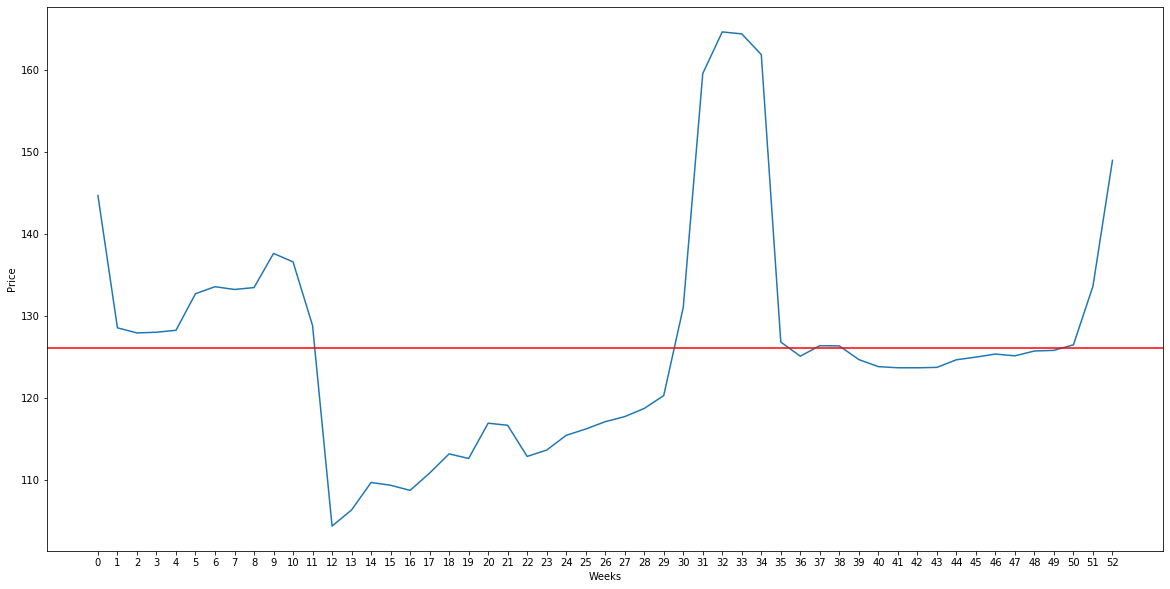

In [57]:
'''
x = len(avg_price_per_night_by_week)
plt.bar(x, avg_price_per_night_by_week['price'])
plt.ylabel('Price')
plt.xticks(x,avg_price_per_night_by_week['week_number'],rotation='vertical')
plt.show

#df = pd.DataFrame(avg_price_per_night_by_week, columns = avg_price_per_night_by_week.columns ) 
  
# create histogram for numeric data 
plt.bar(avg_price_per_night_by_week['week_number'],avg_price_per_night_by_week['price']) 
plt.xlabel("Weeks") 
plt.ylabel("Price")
plt.xticks(avg_price_per_night_by_week['week_number'])
# show plot 
plt.show() 
'''
plt.figure(figsize=(20,10))
plt.plot(avg_price_per_night_by_week['price'])
plt.xlabel("Weeks") 
plt.ylabel("Price")
plt.xticks(avg_price_per_night_by_week['week_number'])
plt.axhline(calendar['price'].mean(),color='r',label='Avg for Year')
plt.show()

In [58]:
# from the above picture, we can see that cheapest weeks to book accomadation are week 12 to week 29 and then week 35 to week 40

Question 2 # Cheapest place by neighbourhood per night

In [59]:
listings_calendar.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)

neighbourhood
Niddrie                             39.214764
Hyvots and Gilmerton                43.266945
Moredun and Craigour                45.337197
Clovenstone and Wester Hailes       46.000514
Gilmerton South and the Murrays     46.320939
                                      ...    
Pilrig                             222.218469
Leith (Albert Street)              242.604686
Broomhouse and Bankhead            263.734027
Parkhead and Sighthill             377.363616
The Calders                        424.212507
Name: price, Length: 111, dtype: float64

In [60]:
'''
From the above data, below are the top 5 neighbourhood/places where you can get cheap accomadation per night:

Niddrie                             39.214764
Hyvots and Gilmerton                43.266945
Moredun and Craigour                45.337197
Clovenstone and Wester Hailes       46.000514
Gilmerton South and the Murrays     46.320939

'''

'\nFrom the above data, below are the top 5 neighbourhood/places where you can get cheap accomadation per night:\n\nNiddrie                             39.214764\nHyvots and Gilmerton                43.266945\nMoredun and Craigour                45.337197\nClovenstone and Wester Hailes       46.000514\nGilmerton South and the Murrays     46.320939\n\n'

Question 3 # Occupancy ratio / percentage of each accomadation by neighbourhood for the whole year

In [61]:
accom_occu = round(listings_calendar.groupby('neighbourhood')['available'].mean()*100,2)
accom_occu = pd.DataFrame(accom_occu).reset_index()


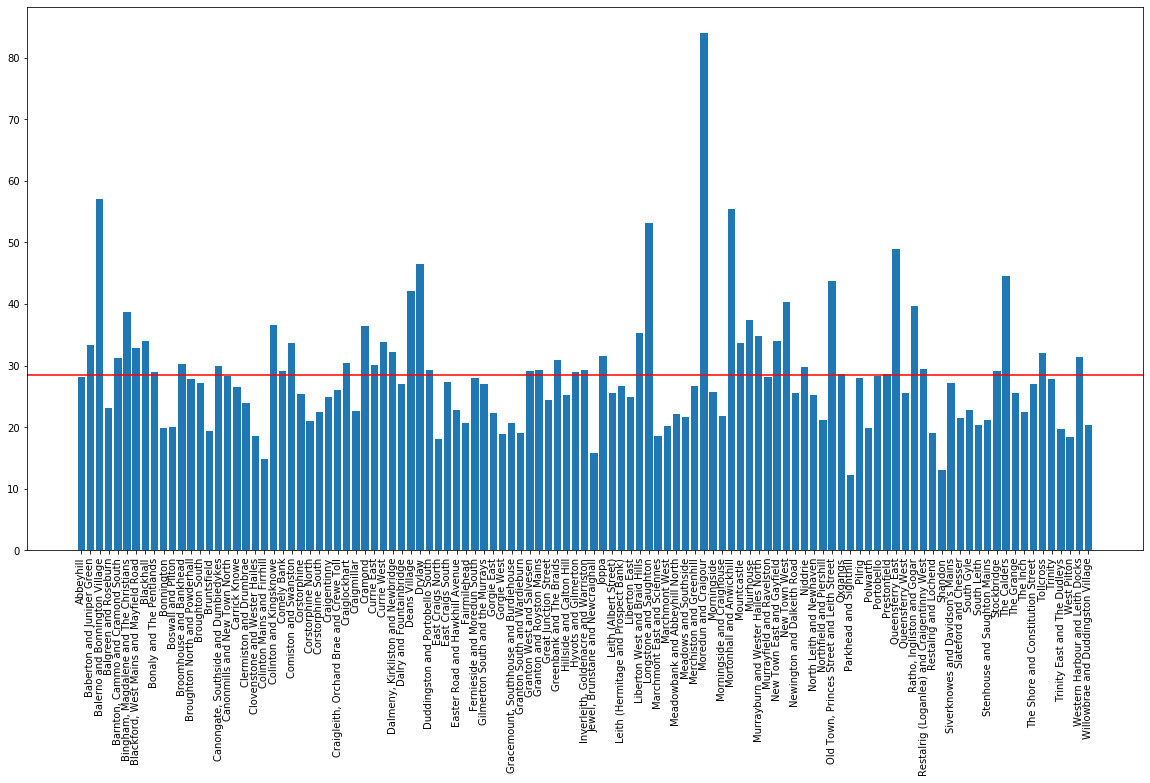

In [62]:
'''
accom_occu
plt.figure(figsize=(20,10))
plt.bar(accom_occu['neighbourhood'])
plt.xlabel("neighbourhood") 
plt.ylabel("available")
#plt.xticks(accom_occu['neighbourhood'].tolist())
plt.show()
'''
plt.figure(figsize=(20,10))
plt.bar(accom_occu['neighbourhood'],accom_occu['available'])
plt.xticks(accom_occu['neighbourhood'],rotation='vertical')
plt.axhline(accom_occu['available'].mean(),color='r',label='Avg availability per year')
plt.show() 

In [63]:
# from the above picture we can see none on the accomadation's occupancy is not even 50% on average when you look at an year.
# most of the accomadation's occupancy level is under 30% itself.


# We may use the review dataset and dig more deep and find out if we can figure out by the feedback left by learning from it 
# and improving the service levels or facilities can boost up the occupancy or present neighbourhood accomadation might be too
# much for avialable business? we don't know. That is beyond current assignemnet and it goes on.

